In [10]:
using Random, LinearAlgebra, Statistics, Distributions, StatsBase

In [2]:
data = vcat(
    rand(Normal(-1.0, 0.5), 500),
    rand(Normal( 2.0, 0.5), 1000)
)

1500-element Vector{Float64}:
 -1.2280568924547572
 -0.4963315285268438
 -1.6097365514240496
 -0.4795853670556969
 -1.212479785548853
 -1.4138561744077844
 -0.6303774354914455
 -1.0415122369818974
 -1.0362384360908035
 -1.3308975343375797
  ⋮
  1.2665336081951644
  2.9058079436129374
  1.2473041333146053
  2.632955877812688
  2.311082109364118
  3.116684605324
  1.6880887219463663
  2.881531730091885
  2.528057601220421

In [3]:
hist = append!(Histogram(-2:0.1:4), data)

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  -2.0:0.1:4.0
weights: [4, 10, 8, 15, 22, 41, 35, 43, 41, 35  …  9, 7, 2, 1, 0, 2, 0, 0, 0, 0]
closed: left
isdensity: false

In [4]:
using Plots

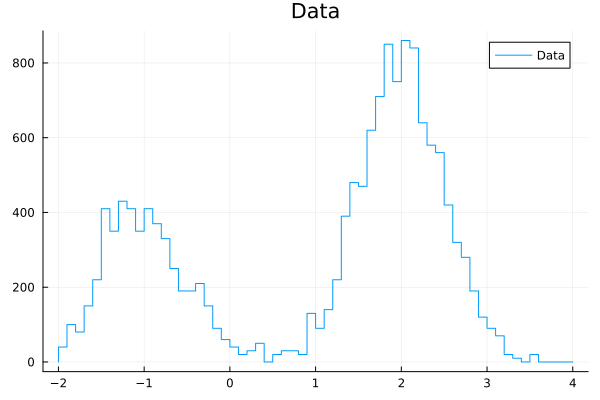

In [15]:
plot(
    normalize(hist, mode=:density),
    st = :steps, label = "Data",
    title = "Data"
)

In [16]:
savefig("tutorial-data.pdf")

"/Users/graemes/code/julia-playground/bat/tutorial-data.pdf"

In [7]:
function fit_function(p::NamedTuple{(:a, :mu, :sigma)}, x::Real)
    p.a[1] * pdf(Normal(p.mu[1], p.sigma), x) +
    p.a[2] * pdf(Normal(p.mu[2], p.sigma), x)
end


fit_function (generic function with 1 method)

In [8]:
true_par_values = (a = [500, 1000], mu = [-1.0, 2.0], sigma = 0.5)

(a = [500, 1000], mu = [-1.0, 2.0], sigma = 0.5)

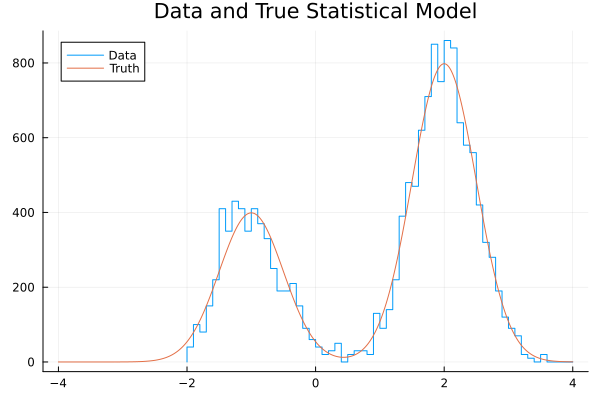

In [13]:
plot(
    normalize(hist, mode=:density),
    st = :steps, label = "Data",
    title = "Data and True Statistical Model"
)
plot!(
    -4:0.01:4, x -> fit_function(true_par_values, x),
    label = "Truth"
)

In [14]:
savefig("tutorial-data-and-truth.pdf")

"/Users/graemes/code/julia-playground/bat/tutorial-data-and-truth.pdf"

In [11]:
using IJulia